# Bike-Sharing Data Exploration
# By Idan Wisman

Ford GoBike System Data: This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area



## First I would want to explore and clean the dataset

In [242]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")

In [243]:
# load in the dataset into a pandas dataframe, print statistics
gobike = pd.read_csv('201902-fordgobike-tripdata.csv')
gobike.head()


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [244]:
gobike.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


In [245]:
# high-level overview of data shape and composition
gobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [246]:
# checking the shape of dataframe
gobike.shape

(183412, 16)

In [247]:
gobike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000



# cleaning the following things
* data type adjustments - start and end time from object to datetime, station id and birth year from float to int.
* null values in all stations columns, in birth_year and gender 
* I will add a column of user age and duration time in minutes 


In [248]:
# making a copy of the dataset before wrangeling
df = gobike.copy()
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


# define
will drop all the rows with null values for better analysis and visualizasions processes using dropna() function

In [249]:
# checking the null values
df.isnull().sum()


duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [250]:
#droping all those null values
df.dropna(axis=0,inplace=True)


# test

In [251]:
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

# define
I will convert the start time and end time to a datetime using to_datetime() function.
I will convert the station id and birth year from float to int using astype()

In [252]:
#  converting the start time and end time to datetime

df[['start_time', 'end_time']] = df[['start_time', 'end_time']].apply(pd.to_datetime, errors='coerce')

# converting the station_id and birth_year to int

df[['start_station_id', 'end_station_id', 'member_birth_year']] = df[['start_station_id', 'end_station_id', 'member_birth_year']].astype('int64')


In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  int64         
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  int64         
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

# test

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  int64         
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  int64         
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [255]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No


# define 
I will add 4 new columns: 
* "age" by substracting the data current year from member_birth_year and will limit the age to 80 years old.
* "start_hour" and "end_hour" to be able to analyze the popular riding times usind dt.hour
* duration time in minutes to have a better grasp of the duration time by dividing duration seconds by 60


In [256]:
# creating the age coloumn
df['age'] = 2019 - df['member_birth_year'] 
# limiting the age to 80 years old by dropping all the rows of age larger then 80
df.drop(df[(df.age > 80 )].index, inplace = True)



In [257]:
# adding start_hour coloumn
df['start_hour'] = df['start_time'].dt.hour
# adding end_hour coloumn
df['end_hour'] = df['end_time'].dt.hour


In [258]:
# adding duration_minutes coloumn
df['duration_minutes'] = df['duration_sec'] / 60
# adding duration_hour column
df['duration_hour'] = df['duration_minutes'] / 60

# test

In [259]:
df.describe()


,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,age,start_hour,end_hour,duration_minutes,duration_hour
count,174760.000000,174760.000000,174760.000000,174760.000000,174760.000000,174760.000000,174760.000000,174760.000000,174760.000000,174760.000000,174760.000000,174760.000000,174760.000000,174760.000000
mean,704.309630,139.021172,37.771202,-122.351719,136.641217,37.771398,-122.351295,4482.333749,1984.874777,34.125223,13.456100,13.609527,11.738494,0.195642
std,1643.031657,111.649138,0.100442,0.117775,111.350577,0.100346,0.117338,1659.222583,9.877739,9.877739,4.735548,4.749307,27.383861,0.456398
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1939.000000,18.000000,0.000000,0.000000,1.016667,0.016944
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000,27.000000,9.000000,9.000000,5.383333,0.089722
50%,511.000000,104.000000,37.780787,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000,32.000000,14.000000,14.000000,8.516667,0.141944
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.285633,5505.000000,1992.000000,39.000000,17.000000,18.000000,13.150000,0.219167
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,80.000000,23.000000,23.000000,1409.133333,23.485556


In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174760 entries, 0 to 183411
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174760 non-null  int64         
 1   start_time               174760 non-null  datetime64[ns]
 2   end_time                 174760 non-null  datetime64[ns]
 3   start_station_id         174760 non-null  int64         
 4   start_station_name       174760 non-null  object        
 5   start_station_latitude   174760 non-null  float64       
 6   start_station_longitude  174760 non-null  float64       
 7   end_station_id           174760 non-null  int64         
 8   end_station_name         174760 non-null  object        
 9   end_station_latitude     174760 non-null  float64       
 10  end_station_longitude    174760 non-null  float64       
 11  bike_id                  174760 non-null  int64         
 12  user_type       

# define
will drop all the unnecessary columns and only keep the columns that I will visualize using drop() function

In [261]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,start_hour,end_hour,duration_minutes,duration_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984,Male,No,35,17,8,869.750000,14.495833
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972,Male,No,47,12,5,1030.900000,17.181667
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989,Other,No,30,17,4,608.166667,10.136111
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974,Male,Yes,45,23,0,26.416667,0.440278
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,...,5200,Subscriber,1959,Male,No,60,23,0,29.883333,0.498056


In [262]:
#using drop to remove unwanted columns
df = df.drop(['start_station_id','start_station_latitude','start_station_longitude','end_station_id','member_birth_year','end_station_latitude','end_station_longitude','bike_id','member_birth_year'], axis = 1)

In [263]:
# using round() to round to 2 decimal points
df = df.round(2)

# test

In [264]:
df.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,user_type,member_gender,bike_share_for_all_trip,age,start_hour,end_hour,duration_minutes,duration_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,Male,No,35,17,8,869.75,14.50
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,Male,No,47,12,5,1030.90,17.18
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,Other,No,30,17,4,608.17,10.14
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,Male,Yes,45,23,0,26.42,0.44
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,Subscriber,Male,No,60,23,0,29.88,0.50


In [265]:
# dataset shape after wrangeling
df.shape

(174760, 13)

### What is the structure of your dataset?

The original dataset before wrangling was 183412 rows and 16 columns.
after wrangling it is now 174760 rows and 13 columns.

### What is/are the main feature(s) of interest in your dataset?

Main intrests are the diffrent aspects of users that are using the platform.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I will explore the relationships between the diffrent kind of user type, gender and age and also the rates of users using the company's program "bike_share_for_all_trip".

# Univariate Exploration

In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


# Creating functions for some plots

In [266]:
#creating a fuction that plots seaborn countplots
def countplot(df, xaxis, hue=None, color=None, palette=None, order=None,title=None,xlabel=None,ylabel=None):
    
    #plot
    sns.countplot(data=df, x=xaxis, hue=hue, color=color, palette=palette, order=order)
    # setting up the title and x,y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Count');
 

In [267]:
#creating a fuction that plots seaborn countplots
def histplot(df, xaxis, hue=None, color=None, palette=None, bins=10,title=None,xlabel=None,ylabel=None):
    
    #plot
    sns.histplot(data=df, x=xaxis, hue=hue, color=color, palette=palette)
    # setting up the title and x,y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Count');
 

In [268]:
#creating a fuction that plots seaborn barplots
def barplot(df, xaxis,yaxis, hue=None, color=None, palette=None, bins=10,title=None,xlabel=None,ylabel=None):
    
    
    #plot
    sns.barplot(data=df, x=xaxis,y=yaxis, hue=hue, color=color, palette=palette)
    # setting up the title and x,y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel);
 

In [269]:
#creating a fuction that plots seaborn boxplots
def boxplot(df, xaxis,yaxis,title=None,xlabel=None,ylabel=None):
    
    
    #plot
    sns.boxplot(data=df, x=xaxis,y=yaxis)
    # setting up the title and x,y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel);
 

# 1. What is the distribution of User Type?

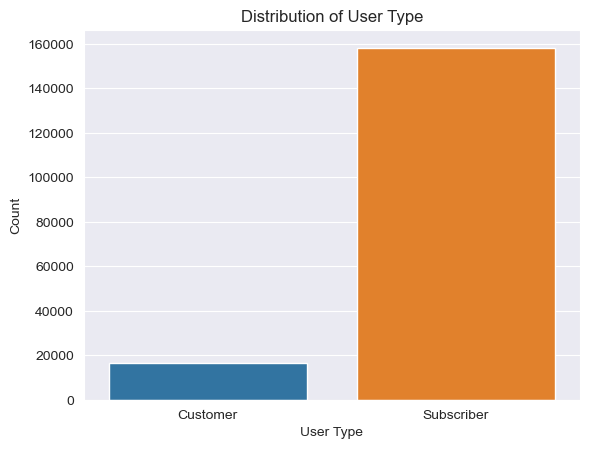

In [270]:
# will display it using seaborn countplot
countplot(df,'user_type',title = 'Distribution of User Type',xlabel ='User Type' )


# Answer
Most users are  subscribers with proximetly 160000 users compared to customers with little less then 20000 users

# 2. What is the distribution of User Gender?

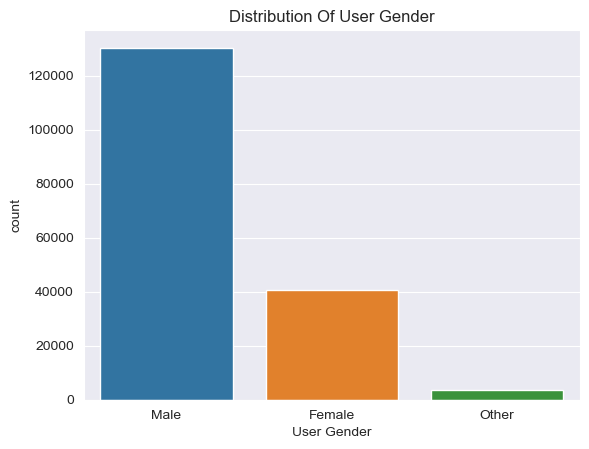

In [271]:
# will display it using seaborn countplot
sns.countplot(x='member_gender', data=df, order = ['Male', 'Female', 'Other'])
plt.title('Distribution Of User Gender')
plt.xlabel('User Gender');

# Answer
We can see that more then 3 times more males using the platform then females and other gender much less

# 3. How many Users are using the company's program?

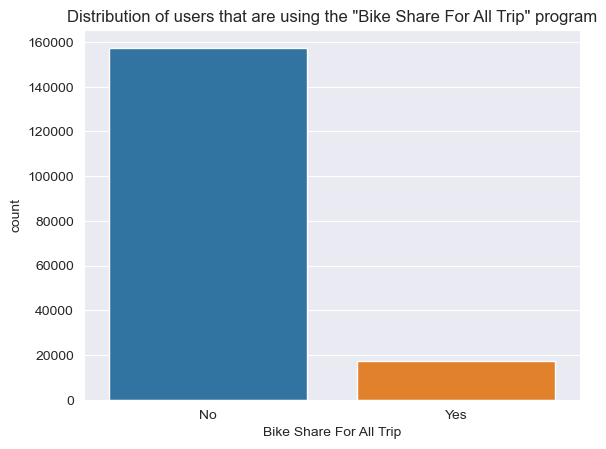

In [272]:
# will display it using seaborn countplot
sns.countplot(x='bike_share_for_all_trip', data=df, order = ['No', 'Yes'])
plt.title('Distribution of users that are using the "Bike Share For All Trip" program')
plt.xlabel('Bike Share For All Trip');

# Answer
The vast majority of users are not taking part of the company's program 

# 4. What is the distribution of  the users' age?

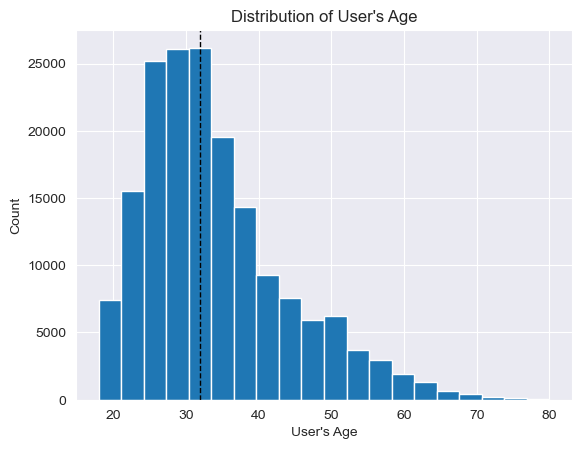

In [273]:
# will display it using matplotlib histogram plot
plt.hist(df.age, bins = 20)
plt.axvline(df.age.median(), color='k', linestyle='dashed', linewidth=1)

plt.title("Distribution of User's Age")
plt.xlabel("User's Age")
plt.ylabel('Count');

# Answer
most of the users are between the ages of 20-40 years old with the most popular age group between 28-32 years old. the median is around 32 years old and from that point there is a gradual decrease in age.

# 5. Does the age column have outlier values?
the histogram doesn't show if there are any outliers so i will show it using a boxplot.

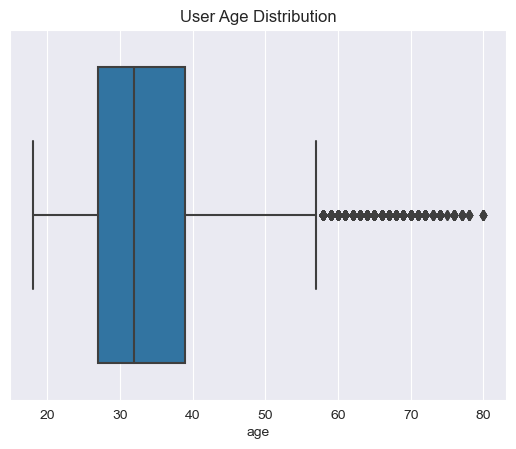

In [274]:
# will display it using seaborn boxplot
sns.boxplot(x ='age', data=df)
plt.title('User Age Distribution');

# Answer
according to the boxplot above we can see that even though in the wrangling process I limited the age to 80 years old there are quite a lot of outlier values from around 58 years old.

# 6. what is the distribution of Duration Time in minutes?

''

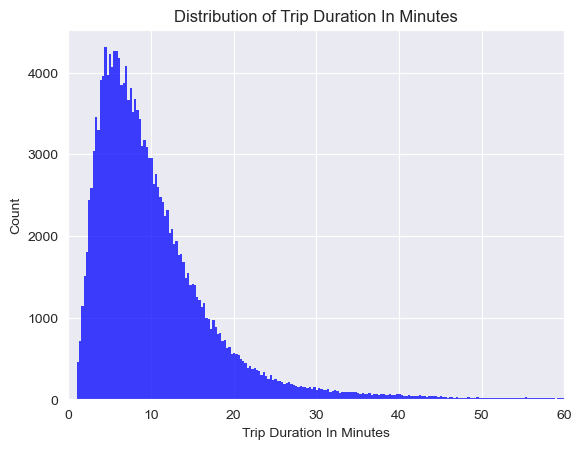

In [275]:
# will display it using seaborn histogram plot
histplot(df,xaxis='duration_minutes',color='blue',bins=60,title='Distribution of Trip Duration In Minutes',xlabel='Trip Duration In Minutes')
plt.xlim(0, 60)
;

# answer
most of the trips were between 1-25 minutes

# 7. What are the popular start hours?

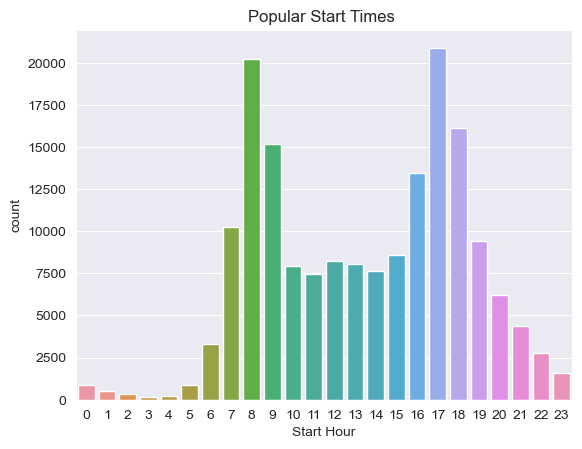

In [276]:
# will display it using seaborn countplot
sns.countplot(x='start_hour', data = df)
plt.title('Popular Start Times ')
plt.xlabel('Start Hour');


# Answer
we can see that there are two peak times in a day: between 7-9 in the morning where 8 o'clock is the most popular hour and between 4-7 in the evening where 5 o'clock is the most popular hour

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

* I have found that the distribution of the age was right skewed which means that the median and the mean will fall to the right of the mode.
* by looking at the boxplot of the age column I could see that there are quite a lot of outliers.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I found outliers on the age column boxplot yet decided not to drop them since I already limited the age to 80 years old when I wrangled the data earlier. It doesn't affect the analysis in my opinion.

## Bivariate Exploration



# 8. How does starting time affects the duration time?

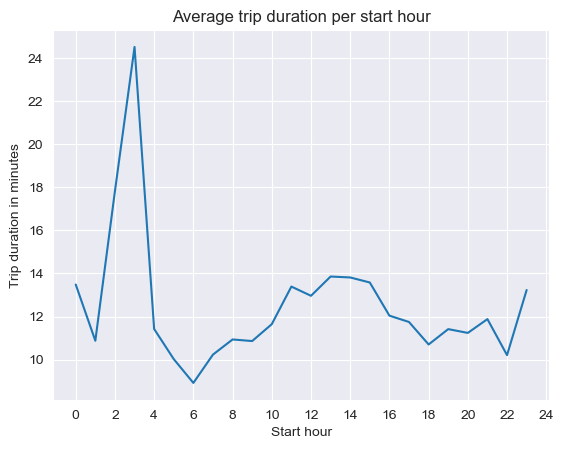

In [277]:
# plotting line chart to find peak times 
df.groupby('start_hour')['duration_minutes'].mean().plot(kind='line')
plt.title('Average trip duration per start hour')
plt.ylabel('Trip duration in minutes')
plt.xlabel('Start hour')
plt.xticks([x for x in range(0,25, 2)]);


# Answer
Surprising to see that the longest trip times occur when the starting time is at 3am. The results seem a little strange so I decided to explore it further

In [278]:
# wanted to see the actual distribution first
df.groupby('start_hour')['duration_minutes'].mean().sort_values(ascending=False)


start_hour
3     24.531524
2     17.829634
13    13.858674
14    13.815584
15    13.581591
0     13.487635
11    13.392384
23    13.232570
12    12.963205
16    12.040521
21    11.879650
17    11.745798
10    11.643988
4     11.419780
19    11.414211
20    11.237916
8     10.933504
1     10.874095
9     10.859687
18    10.700063
7     10.229931
22    10.205965
5     10.020935
6      8.913424
Name: duration_minutes, dtype: float64

# 9. I wanted to see if there are some unusual outliers so I plotted a boxplot

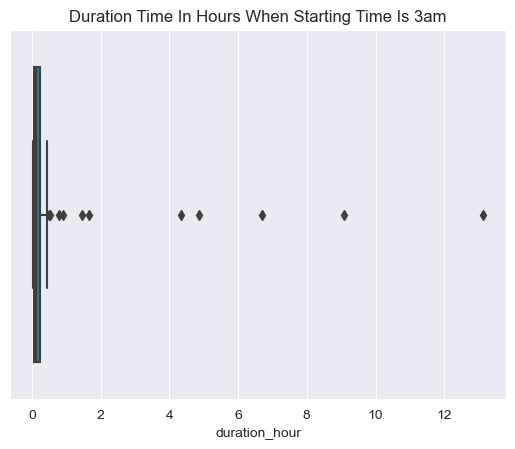

In [279]:
# displying it using seaborn boxplot
#start_at_3 = df[df['start_hour'] == 3]['duration_minutes']
start_at_3 = df[df['start_hour'] == 3]['duration_hour']
sns.boxplot(x = start_at_3)
plt.title('Duration Time In Hours When Starting Time Is 3am');

# Answer
First I plotted a boxplot to see the duration time in minutes when the starting time is 3am and saw unusual outliers. So I changed the plot and looked at it when duration time is in hours and saw a few times that the duration time was 7, 9 and 13 hours, which caused the mean time to increase and explains the unusual outcome.

# 10. What ages are using the Trip For All program?

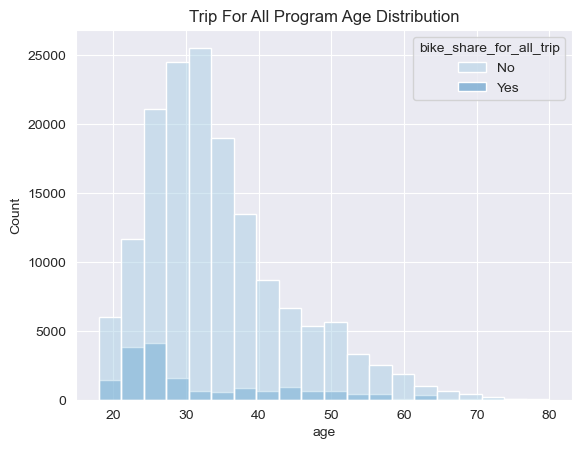

In [280]:
# will display it using seaborn histogram and add the second veriable as colors
sns.histplot(x = 'age', data= df, bins = 20,  hue = 'bike_share_for_all_trip', palette= 'Blues')
plt.title('Trip For All Program Age Distribution');


# Answer
Users between the ages of 22 and 27 are using the program the most

# 11.  What is the distribution of the average duration time by gender?

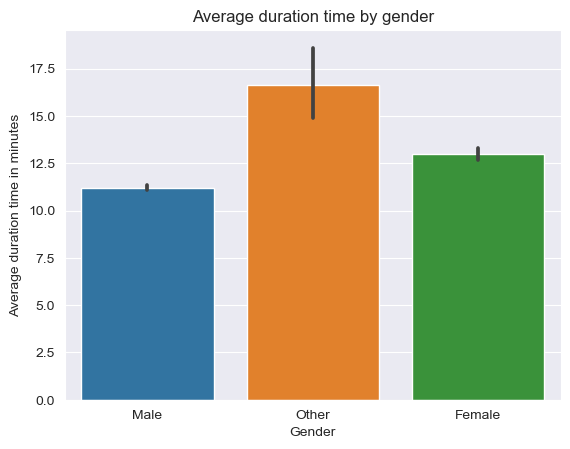

In [281]:
# will display it using seaborn barplot
barplot(df,xaxis='member_gender', yaxis='duration_minutes', title='Average duration time by gender',xlabel='Gender',ylabel='Average duration time in minutes' )
#sns.barplot(data = df, y = 'duration_minutes', x = 'member_gender')
#plt.title('Average duration time by gender')
#plt.xlabel('Gender')
#plt.ylabel('Average duration time in minutes');

# Answer
Females have longer duration times on average compared to males

# 12. What is the distribution of average duration time by user type?

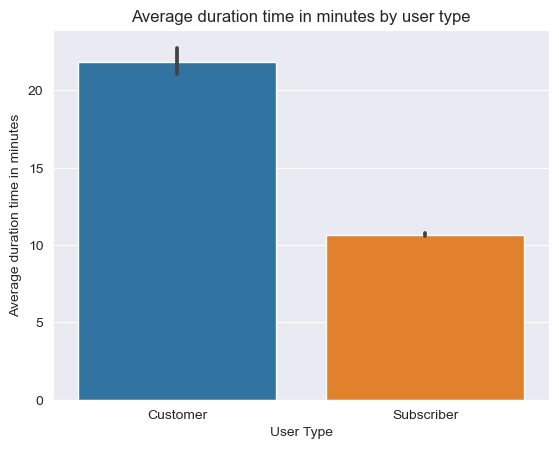

In [282]:
# will display it using seaborn barplot

sns.barplot(data = df, x = 'user_type', y= 'duration_minutes')
plt.title('Average duration time in minutes by user type')
plt.xlabel('User Type')
plt.ylabel('Average duration time in minutes');

# Answer
Customers have two times longer duration time on average compared to subscribers. 

# 13. What is the distribution of users' age between the two user types?

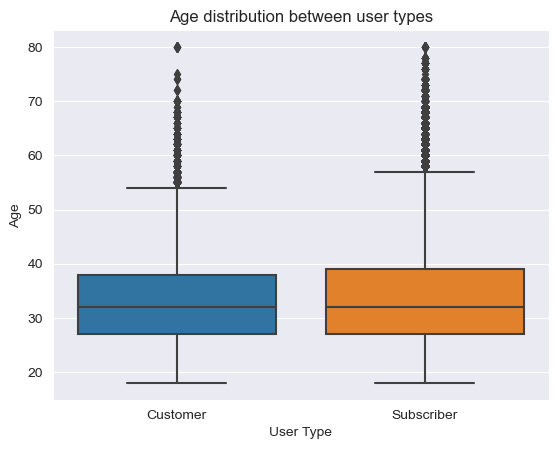

In [283]:
# will display it using seaborn boxplot
boxplot(df,xaxis='user_type',yaxis='age',title='Age distribution between user types',xlabel='User Type',ylabel='Age')



# Answer
The age distribution over the two user types seems the same overall. 

# 14. What is the distribution of users' ages between the genders?

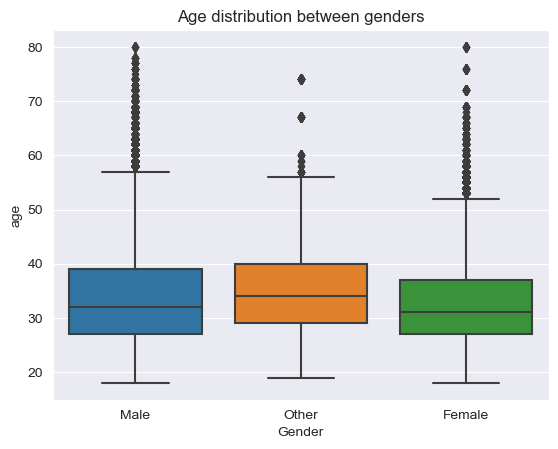

In [284]:
# will display it using seaborn boxplot

sns.boxplot(data=df, x = "member_gender", y='age')
plt.title('Age distribution between genders')
plt.xlabel('Gender');


# Answer
No significant difference between the gender age distribution 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

* I looked at duration time and start hour and found an unexpected outcome that the longest duration time at start hour of 3am. This led me to a further investigation and I found that there were very large outlier values which can explain it.
* On another part of the investigation I saw that duration time for customers is much longer then for subscribers and if I'm       putting the two duration times together it might sugggest a correlation.
* Although we could see previously that males are using the platform more then females, when I was looking at duration time         between the genders, females had longer duration times than males.
* The company's program, Bike Share For All Trip, doesn't seem to be very popular. I wanted to identify the age groups that are     using it more and found that 22-27 year-olds are using it most. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No

## Multivariate Exploration
# in this section i would like to investigate other aspects concerning the company's program: "Bike share for all trip"


# 15. What is the distibution of users that are using the bike share for all program and duration time?

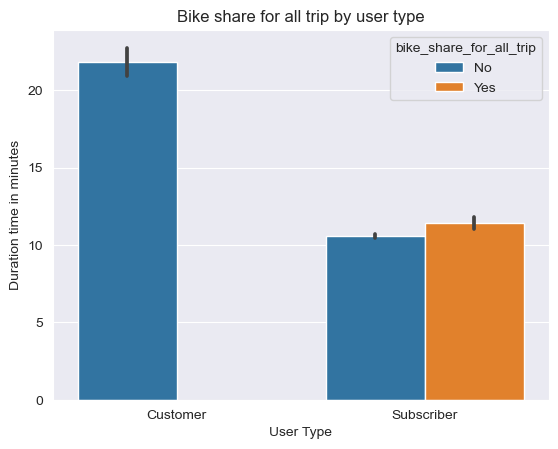

In [285]:
# will display it using seaborn barplot
sns.barplot(data = df, x = 'user_type', y= 'duration_minutes', hue = 'bike_share_for_all_trip' )
plt.title('Bike share for all trip by user type')
plt.xlabel('User Type')
plt.ylabel('Duration time in minutes');

# Answer
We can see that in general customers are having longer duration times then subscribers yet there is an interesting finding that  subscribers that joined the program have a longer duration time.

# 16. How does the bike share for all trip program affect the trip duration and start hour?

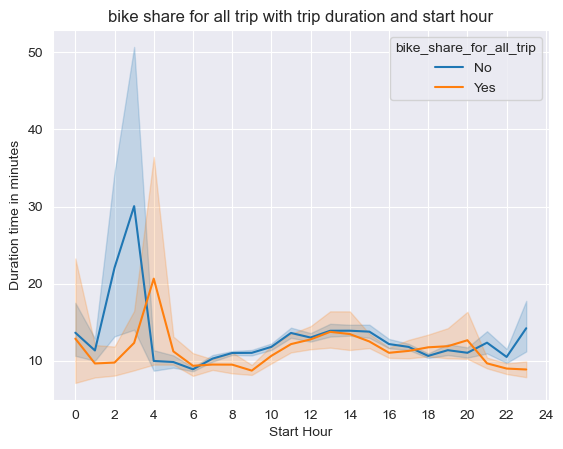

In [286]:
# will display it using seaborn lineplot
sns.lineplot(data=df,x='start_hour',y='duration_minutes', hue = 'bike_share_for_all_trip')
plt.xticks([x for x in range(0,25, 2)])
plt.title('bike share for all trip with trip duration and start hour')
plt.xlabel('Start Hour')
plt.ylabel('Duration time in minutes');

# Answer
Doesn't look like there is a big difference; the popular starting hours are between 1-5am

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

In the last part of the investigation I was trying to better understand the Bike Share For All Trip program and I could see that the reason why the number of yes responses looked very small at first was because it's a program that is only available to subscribers. A little more than half of the subscribers are using the program.  

### Were there any interesting or surprising interactions between features?

Not more then what I have mentioned above

## Conclusions

# summary of main findings:
* There are significantly more males using the platform then females.
* Between the two genders, females have a longer duration time.
* The subscribers using the program have a longer duration time.
* There are 8 times more subscibers using the platform than customers.
* Customers have longer duration times then subscribers.
* Most of the trips are between 1-25 minutes long.

I started with a univirate exploration to get a basic understanding of the distributions in the dataset. From there I investigated relationships between two variables to help me understand how the diffrent aspects in the dataset interact with each other. Then I decided to focus on the Bike Share For All Trip since it could be helpful to the company if we can improve it.


In [287]:
df.to_csv('GoBike Clean.csv')